In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [19]:
from scipy.stats import norm
from scipy.special import gamma
from scipy.integrate import quad

# Gamma Distribution Laplace Propagation

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


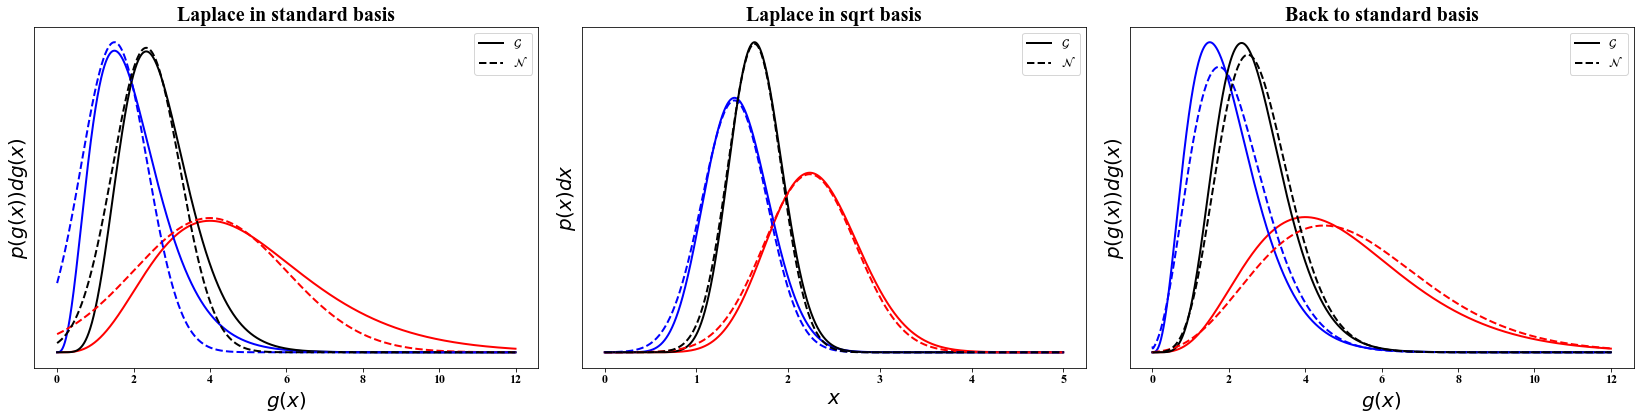

In [44]:
#change the basis, i.e. x -> t(x)

###########SQUARE###################
#square transform <-> sqrt basis

def gamma_pdf(x, a, l):
    r = l**a/gamma(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_t_sqrt(x, a, l):
    c = 1/2 * l**(-a-0.5) * gamma((2*a+1)/2)
    r = 1/c * (x**(2*a)) * (np.exp(- (x**2) * l))
    return(r)

    
"""Transforms"""
def gamma_mode(a, l):
    return((a-1)/l)

def gamma_t_sqrt_mode(a, l):
    return(np.sqrt(a/l))

def gamma_var(a,l):
    return((a-1)/l**2)

def gamma_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3

#normal
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(gamma_var(a1, l1))
sigma2 = np.sqrt(gamma_var(a2, l2))
sigma3 = np.sqrt(gamma_var(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_t = np.linspace(0, 5, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#transform

y1_t_sqrt = gamma_pdf_t_sqrt(x_t, a1, l1)
y2_t_sqrt = gamma_pdf_t_sqrt(x_t, a2, l2)
y3_t_sqrt = gamma_pdf_t_sqrt(x_t, a3, l3)
mode1_t_sqrt = gamma_t_sqrt_mode(a1, l1)
mode2_t_sqrt = gamma_t_sqrt_mode(a2, l2)
mode3_t_sqrt = gamma_t_sqrt_mode(a3, l3)

sigma1_t_sqrt = np.sqrt(gamma_t_sqrt_var(l1))
sigma2_t_sqrt = np.sqrt(gamma_t_sqrt_var(l2))
sigma3_t_sqrt = np.sqrt(gamma_t_sqrt_var(l3))
lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

#back transform
y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt)
y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt)
y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt)

"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=2, alpha=1)#, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=2, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[0].plot(x, lp_approx1, 'r--', lw=2, alpha=1)#, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=2, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=2, alpha=1)#, label='gamma trans')
axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=2, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=2, alpha=1)#, label='lp approx trans')
axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=2, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in sqrt basis', fontsize=20)
axs[1].legend();


#"""
axs[2].plot(x, y1, 'r-', lw=2)#, label="gamma");
axs[2].plot(x, y2, 'b-', lw=2)#, label="exponential");
axs[2].plot(x, y3, 'k-', lw=2, label="$\mathcal{G}$");
axs[2].plot(x, y1_back, 'r--', lw=2)#, label="back transform")
axs[2].plot(x, y2_back, 'b--', lw=2)#, label="back transform")
axs[2].plot(x, y3_back, 'k--', lw=2, label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();
#"""

plt.tight_layout()
plt.savefig('gamma_bridge_sqrt.pdf')
#tpl.save('Gamma_Bridge_sqrt.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
#         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
plt.show();

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


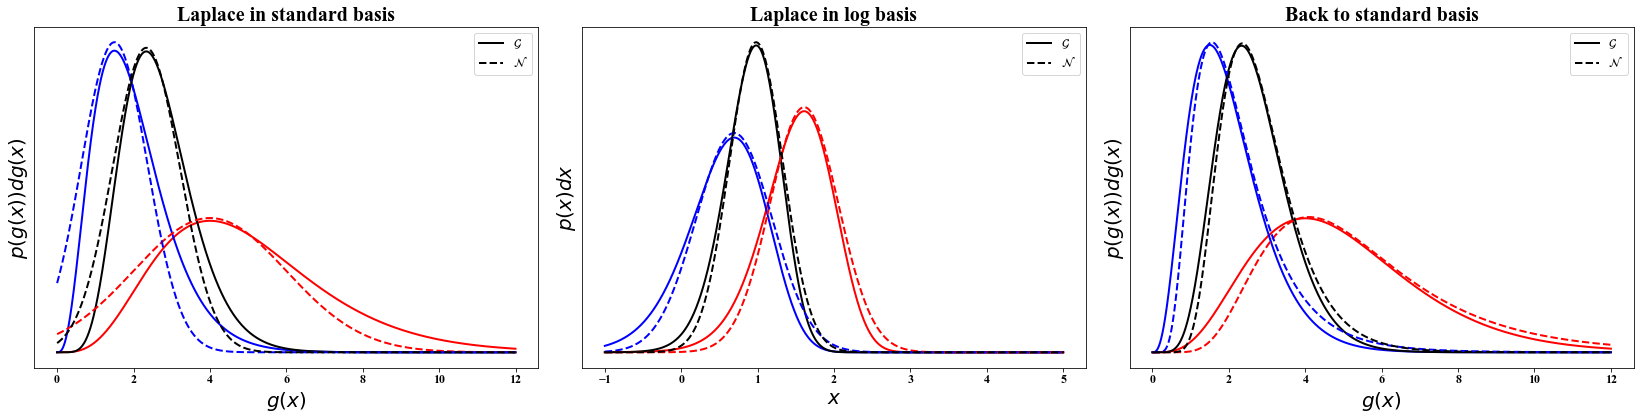

In [45]:
#change the basis, i.e. x -> t(x)

#######EXPONENTIAL BASIS TRANSFORM########
#exp transform <-> log basis

def gamma_pdf(x, a, l):
    r = l**a/gamma(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_t_log_unnormalized(x, a, l):
    r = (np.exp(x) ** a) * (np.exp(-np.exp(x) * l))
    return(r)

def gamma_pdf_t_log(x, a, l):
    #c, _ = quad(gamma_pdf_t_log_unnormalized, 0, 100, args=(a,l))
    c = gamma(a) /l**a
    r = 1/c * (np.exp(x) ** a) * (np.exp(-np.exp(x) * l))
    return(r)
    
"""Transforms"""
def gamma_mode(a, l):
    return((a-1)/l)

def gamma_t_log_mode(a, l):
    return(np.log(a/l))

def gamma_var(a,l):
    return((a-1)/l**2)

def gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3

#normal
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(gamma_var(a1, l1))
sigma2 = np.sqrt(gamma_var(a2, l2))
sigma3 = np.sqrt(gamma_var(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_t = np.linspace(-1, 5, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#transform

y1_t_log = gamma_pdf_t_log(x_t, a1, l1)
y2_t_log = gamma_pdf_t_log(x_t, a2, l2)
y3_t_log = gamma_pdf_t_log(x_t, a3, l3)
mode1_t_log = gamma_t_log_mode(a1, l1)
mode2_t_log = gamma_t_log_mode(a2, l2)
mode3_t_log = gamma_t_log_mode(a3, l3)

sigma1_t_log = np.sqrt(gamma_t_log_var(a1))
sigma2_t_log = np.sqrt(gamma_t_log_var(a2))
sigma3_t_log = np.sqrt(gamma_t_log_var(a3))
lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log) 
lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log) 
lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log) 

#back transform
y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log)
y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log)
y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log)

"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=2, alpha=1)#, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=2, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[0].plot(x, lp_approx1, 'r--', lw=2, alpha=1)#, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=2, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_log, 'r-', lw=2, alpha=1)#, label='gamma trans')
axs[1].plot(x_t, y2_t_log, 'b-', lw=2, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_log, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=2, alpha=1)#, label='lp approx trans')
axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=2, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in log basis', fontsize=20)
axs[1].legend();


#"""
axs[2].plot(x, y1, 'r-', lw=2)#, label="gamma");
axs[2].plot(x, y2, 'b-', lw=2)#, label="exponential");
axs[2].plot(x, y3, 'k-', lw=2, label="$\mathcal{G}$");
axs[2].plot(x, y1_back, 'r--', lw=2)#, label="back transform")
axs[2].plot(x, y2_back, 'b--', lw=2)#, label="back transform")
axs[2].plot(x, y3_back, 'k--', lw=2, label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();
#"""

plt.tight_layout()
plt.savefig('gamma_bridge_log.pdf')
#tpl.save('Gamma_Bridge_log.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
#         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
plt.show();